In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns

In [2]:
test550 = pd.read_csv("../../data/test550_30-06-2021.csv",index_col=0,parse_dates=True)
test600 = pd.read_csv("../../data/test600_30-06-2021.csv",index_col=0,parse_dates=True)
test700 = pd.read_csv("../../data/test700_30-06-2021.csv",index_col=0,parse_dates=True)
test900 = pd.read_csv("../../data/test900_30-06-2021.csv",index_col=0,parse_dates=True)
sensores = list(test900.columns)
ref = "fluke"
sensores.remove(ref)
datos = pd.concat([test550,test600,test700,test900],axis=0)


In [3]:
diferencia = pd.concat([datos[sensor]-datos[ref] for sensor in sensores],axis=1)
diferencia.columns = sensores


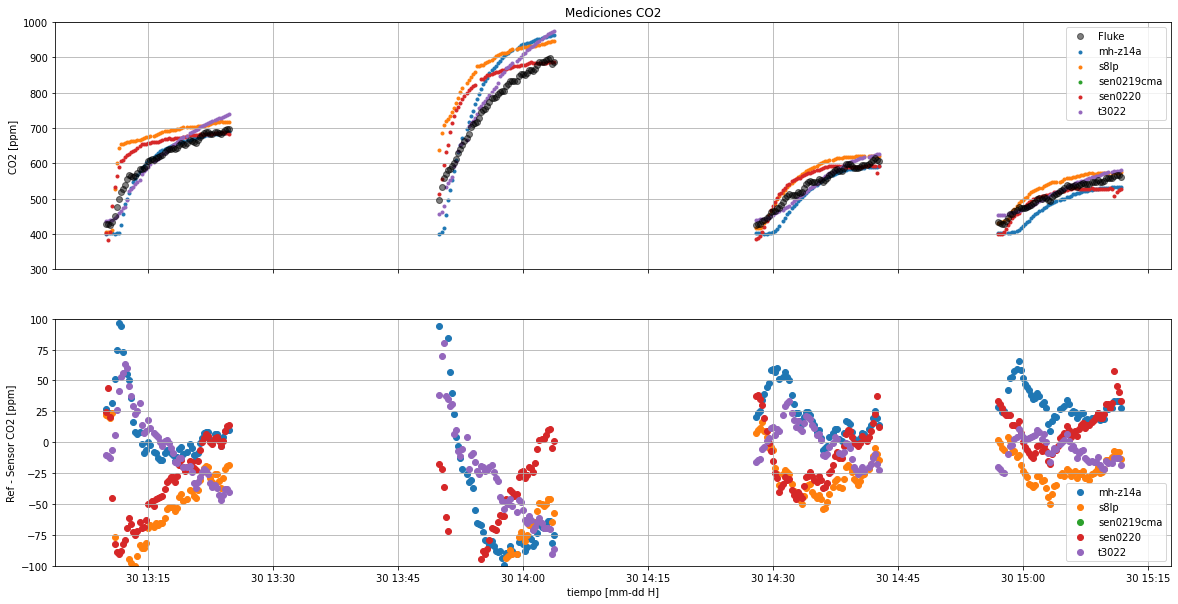

In [4]:
fig, ax = plt.subplots(2,figsize=(20,10),sharex=True)



ax[0].set_ylim(300,1000)
ax[0].set_ylabel("CO2 [ppm]")
ax[0].set_title("Mediciones CO2")


ax[1].set_ylim(-100,100)
ax[1].set_ylabel("Ref - Sensor CO2 [ppm]")
ax[1].set_xlabel("tiempo [mm-dd H]")


ax[0].plot(datos.fluke,"ko",label="Fluke",alpha=0.5)
for sensor in sensores:
    ax[0].scatter(datos[sensor].index,datos[sensor],label=sensor,marker=".")


for sensor in sensores:
    ax[1].scatter(datos.index,datos[ref]-datos[sensor],label=sensor)


ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()




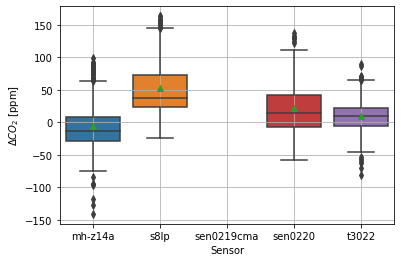

In [5]:
plt.ylabel("$\Delta CO_2$ [ppm]")
plt.xlabel("Sensor")
sns.boxplot(data=diferencia,showmeans=True)

plt.grid() 

In [6]:
print(diferencia.mean())
print(diferencia.std())


mh-z14a       -4.967552
s8lp          52.271386
sen0219cma          NaN
sen0220       21.489316
t3022          9.669617
dtype: float64
mh-z14a       45.584045
s8lp          44.742104
sen0219cma          NaN
sen0220       40.089198
t3022         27.809049
dtype: float64


In [7]:
for sensor in sensores:
    print(sensor,round(diferencia[sensor].mean(),0),round(diferencia[sensor].std(),0))

mh-z14a -5.0 46.0
s8lp 52.0 45.0
sen0219cma nan nan
sen0220 21.0 40.0
t3022 10.0 28.0
